## T2.3: Scraping de Web Service de Red Eléctrica
### Autor: Ralphy Núñez Mercado

<p>
Fai unha función en Python que descargue a información dun día dado en: es / mercados / precios-mercados-tiempo-real.  

Imprime por pantalla os prezos de cada franxa horaria por megavatio/hora e indica cales son:

- As dúas horas máis baratas.  
- As dúas horas máis caras.  
- A media do día.  
- Fai unha gráfica de barras con MatPlotLib.
</p>

### ⬇️📦 Mágias para la instalación de los paquetes.

In [ ]:
%conda install -y pandas # o  %pip install pandas
%conda install -y requests #o %pip install requests
%conda install -y matplotlib # o %pip install matplotlib
%conda install -y numpy # o %pip install numpy

### ⬇️📦 Importación de los paquetes.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 📨 Hacer request a la api para conseguir los datos y formatear los datos para poder utilizarlos de una manera óptima.  
<a href="https://www.ree.es/es/datos/apidatos">API | Red Eléctrica</a>

In [3]:
def buscar_precios(fecha_inicio, fecha_fin):
    link = f"https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real?start_date={fecha_inicio}T00:00&end_date={fecha_fin}T00:00&time_trunc=hour"
    return link


precios_json = requests.get(buscar_precios("2025-02-03","2025-02-04")).json()

# Extraer los datos de 'included'
datos = precios_json['included'][0]['attributes']['values']

# Convertir los datos en un dataframe
df_precios = pd.DataFrame(datos)

df_precios

,value,percentage,datetime
0,150.94,0.564578,2025-02-03T00:00:00.000+01:00
1,135.98,0.570123,2025-02-03T01:00:00.000+01:00
2,137.55,0.573747,2025-02-03T02:00:00.000+01:00
3,139.61,0.576567,2025-02-03T03:00:00.000+01:00
4,138.92,0.575548,2025-02-03T04:00:00.000+01:00
5,141.66,0.569992,2025-02-03T05:00:00.000+01:00
6,133.92,0.567193,2025-02-03T06:00:00.000+01:00
7,172.65,0.544723,2025-02-03T07:00:00.000+01:00
8,219.18,0.570514,2025-02-03T08:00:00.000+01:00
9,203.74,0.584050,2025-02-03T09:00:00.000+01:00


### 🔢  Obtener las dos horas más baratas.

In [4]:
horas_mas_baratas =  df_precios.sort_values(by='value')

horas_mas_baratas.head(2)

,value,percentage,datetime
6,133.92,0.567193,2025-02-03T06:00:00.000+01:00
1,135.98,0.570123,2025-02-03T01:00:00.000+01:00


### 🔢 Obtener las dos horas más caras.

In [5]:
horas_mas_caras = df_precios.sort_values(by='value', ascending=False) 

horas_mas_caras.head(2)

,value,percentage,datetime
20,360.70,0.613216,2025-02-03T20:00:00.000+01:00
19,326.97,0.619179,2025-02-03T19:00:00.000+01:00


### 🔢 Calcular la media del precio durante el día.

In [6]:
media = df_precios['value'].mean()

print(f"Media de los precios durante el día: {media} €.")

Media de los precios durante el día: 198.11079999999998 €.


### 🔄 Convertir la columna 'datetime' a formato datetime.

In [7]:
df_precios['datetime'] = pd.to_datetime(df_precios['datetime'])

### 📈 Graficar los datos con MatPlotLib.

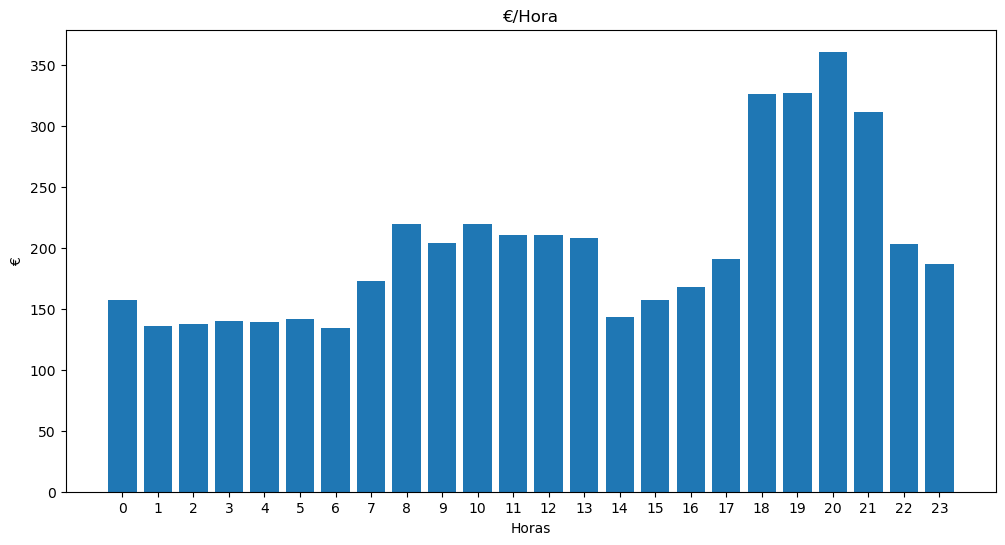

In [8]:
# Por si acaso, ordenar el dataframe por horas.
df_precios = df_precios.sort_values(by='datetime')

x = pd.to_datetime(df_precios["datetime"])
y = df_precios['value']

plt.figure(figsize=(12,6))
plt.xlabel('Horas')
plt.ylabel('€')
plt.title("€/Hora")
plt.xticks(np.arange(0, 24, step=1))
plt.bar(x.dt.hour,y)
plt.show()

